In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from scipy.stats import skew
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/FLIPKART[1].csv' , low_memory=False)

In [3]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,Ok ok product


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [5]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,485,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"1,299",5,Nan,Good
freq,9278,10175,108694,20862,14175


In [6]:
df.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [9]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,Ok ok product


In [10]:
df.shape

(189857, 5)

In [11]:
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [12]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))

In [13]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Super!,Great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",5,Awesome,Best budget 2 fit cooler Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",1,Useless product,Very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"3,999",3,Fair,Ok ok product


In [14]:
import re
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [15]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())
df['Review'] = df['Review'].apply(lambda x: rmv_char(x).lower())
df['Price'] = df['Price'].apply(lambda x: rmv_char(x).lower())
df['ProductName']=df['ProductName'].apply(lambda x:rmv_char(x))

In [16]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3 999,5,super,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3 999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3 999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3 999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3 999,3,fair,ok ok product


In [17]:
# Define a function to preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub('[^a-zA-Z0-9\s]', '', text)

    # Remove stop words
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [18]:
# Apply preprocessing to the reviews
df['Review'] = df['Review'].apply(preprocess)

In [19]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [20]:
# Add a new column 'Sentiment_Score' to the dataframe
df['Sentiment_Score'] = df['Review'].apply(get_sentiment)

In [21]:
# Define a function to map sentiment polarity to sentiment categories
def get_sentiment_label(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [22]:
# Add a new column 'Sentiment' to the dataframe
df['Sentiment'] = df['Sentiment_Score'].apply(get_sentiment_label)

In [23]:
# Print the number of reviews in each sentiment category
print(df['Sentiment'].value_counts())

Positive    123380
Neutral      52720
Negative     13757
Name: Sentiment, dtype: int64


In [24]:
# Print the first 10 rows of the dataframe with the sentiment polarity and sentiment category
print(df[['Review', 'Sentiment_Score', 'Sentiment']].head(10))

               Review  Sentiment_Score Sentiment
0               super         0.333333  Positive
1             awesome         1.000000  Positive
2                fair         0.700000  Positive
3     useless product        -0.500000  Negative
4                fair         0.700000  Positive
5             awesome         1.000000  Positive
6  highly recommended         0.160000  Positive
7                nice         0.600000  Positive
8      unsatisfactory         0.000000   Neutral
9         worth money         0.300000  Positive


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [61]:
# Train and evaluate multiple classification algorithms
classifiers = {
    'LinearSVC': LinearSVC(),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
accuracy_scores = {}

In [64]:
for name, clf in classifiers.items():
    clf.fit(X_train_vect, y_train)
    y_pred = clf.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy:.3f}')
    print(report)
    accuracy_scores[name] = accuracy
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    print('---')

Classifier: LinearSVC
Accuracy: 0.999
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2807
     Neutral       1.00      1.00      1.00     10467
    Positive       1.00      1.00      1.00     24698

    accuracy                           1.00     37972
   macro avg       1.00      1.00      1.00     37972
weighted avg       1.00      1.00      1.00     37972

[[ 2800     5     2]
 [    1 10456    10]
 [    0     6 24692]]
---
Classifier: MultinomialNB
Accuracy: 0.992
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2807
     Neutral       1.00      0.97      0.99     10467
    Positive       0.99      1.00      0.99     24698

    accuracy                           0.99     37972
   macro avg       0.99      0.99      0.99     37972
weighted avg       0.99      0.99      0.99     37972

[[ 2805     1     1]
 [    9 10187   271]
 [    3     7 24688]]
---
Classifier: LogisticRe

In [32]:
# Define a function to generate a word cloud for a given sentiment category
def generate_word_cloud(sentiment):
    # Filter the dataframe for the given sentiment category
    df_sentiment = df[df['Sentiment'] == sentiment]

    # Concatenate all reviews into a single string
    text = ' '.join(df_sentiment['Review'])

    # Generate a word cloud from the text
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=[]).generate(text)
     # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

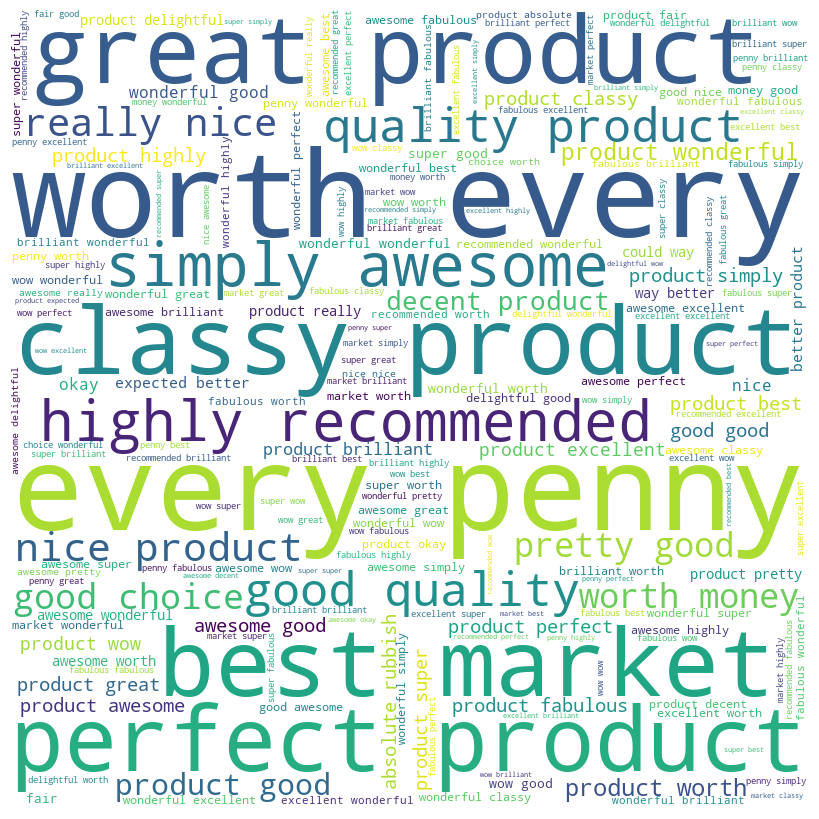

In [33]:
# Generate word clouds for each sentiment category
generate_word_cloud('Positive')

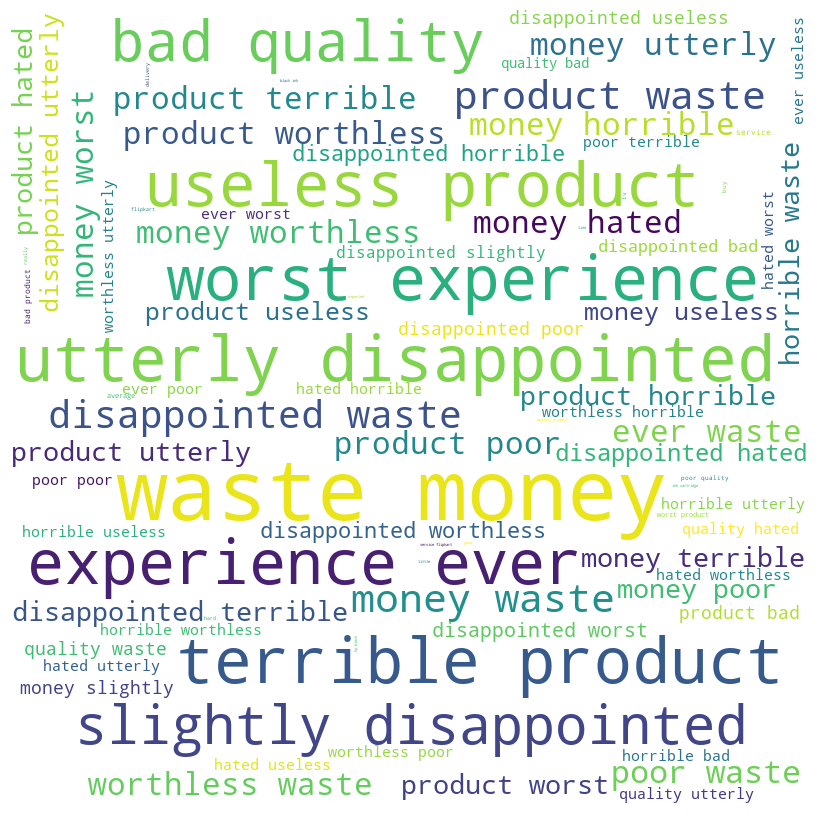

In [34]:
generate_word_cloud('Negative')

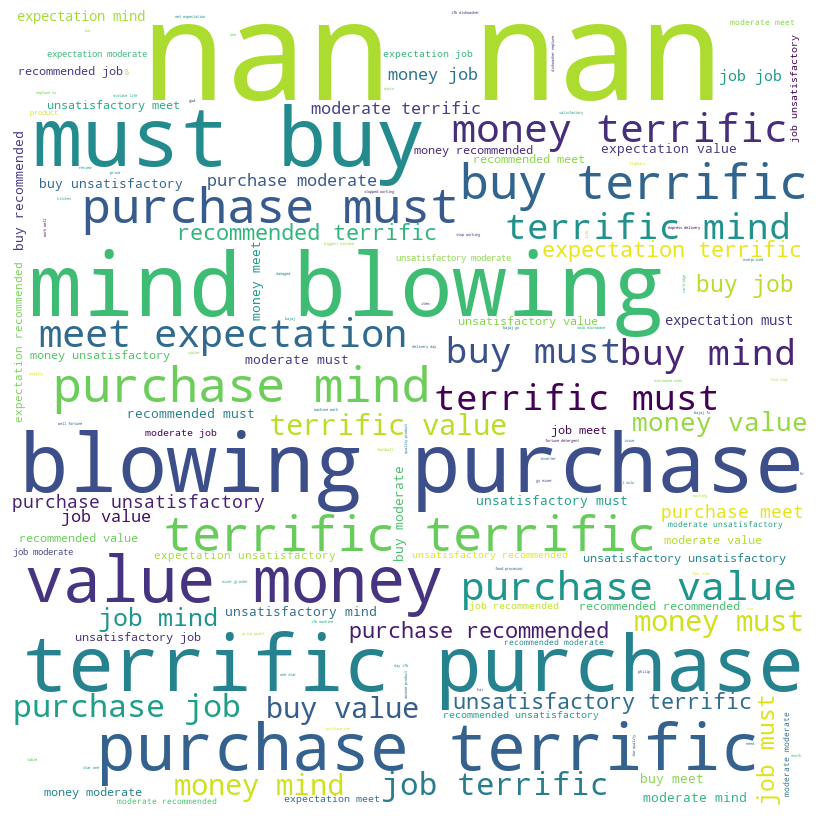

In [35]:
generate_word_cloud('Neutral')

In [40]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# Convert the text reviews into a binary matrix of word occurrences
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review'])

In [48]:
# Convert the binary matrix into a dataframe
df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [58]:
# Convert the input dataframe to boolean
df_bool = df_words.astype(bool)

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.02, use_colnames=True)


In [59]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [60]:
# Print the association rules sorted by lift
print(rules.sort_values('lift', ascending=False))

            antecedents          consequents  antecedent support  \
30  (purchase, blowing)               (mind)            0.028448   
31     (purchase, mind)            (blowing)            0.028448   
34            (blowing)     (purchase, mind)            0.028464   
4             (blowing)               (mind)            0.028464   
5                (mind)            (blowing)            0.028464   
35               (mind)  (purchase, blowing)            0.028464   
9                 (buy)               (must)            0.028701   
8                (must)                (buy)            0.028474   
12              (every)              (penny)            0.028827   
13              (penny)              (every)            0.028822   
39              (every)       (worth, penny)            0.028827   
38       (worth, penny)              (every)            0.028816   
36       (every, worth)              (penny)            0.028822   
41              (penny)       (every, worth)    